<a href="https://colab.research.google.com/github/IshwaryaSriram/NIDS/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dataset

In [ ]:
import pandas as pd
from tensorflow.keras.utils import get_file

try:
    path = get_file('kddcup.data_10_percent.gz', origin=
    'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise
    
print(path) 

# This file is a CSV, just no CSV extension or headers
# Download from: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
df = pd.read_csv(path, header=None)

print("Read {} rows.".format(len(df)))

df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)
# display 5 rows
display(df[50000:50100])

2154496/2144903 [==============================] - 0s 0us/step
/root/.keras/datasets/kddcup.data_10_percent.gz
Read 494021 rows.


,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
50000,0,icmp,...,0.0,smurf.
50001,0,icmp,...,0.0,smurf.
...,...,...,...,...,...
50098,0,icmp,...,0.0,smurf.
50099,0,icmp,...,0.0,smurf.


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 42

In [ ]:
df[:20]

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,tcp,...,0.0,normal.
1,0,tcp,...,0.0,normal.
...,...,...,...,...,...
18,0,tcp,...,0.0,normal.
19,0,tcp,...,0.0,normal.


In [ ]:
df.shape

(494021, 42)

In [ ]:
DataTable.max_columns = 20

In [ ]:
output = df['outcome'].values
labels = set(output)
labels = list(labels)
print('The different type of output labels are:')
print(*labels,sep = "\n")
print('='*125)
print('No. of different output labels are:', len(labels))

The different type of output labels are:
pod.
phf.
smurf.
perl.
ftp_write.
nmap.
warezclient.
teardrop.
guess_passwd.
loadmodule.
ipsweep.
land.
normal.
multihop.
warezmaster.
rootkit.
back.
satan.
imap.
portsweep.
buffer_overflow.
neptune.
spy.
No. of different output labels are: 23


## Datapreprocessing

Data Cleaning


In [ ]:
print('Null values in dataset are',len(df[df.isnull().any(1)]))

Null values in dataset are 0


In [ ]:
df.dropna(inplace=True,axis=1)
print(df.shape)

(494021, 42)


Checking for Duplicates


In [ ]:
df.drop_duplicates(subset=df.columns, keep='first', inplace = True)
# df.to_pickle('data.pkl')
df.iloc[50000:50100]
print(df.shape)

(145586, 42)


Catergorizing attack classes

In [ ]:
df['outcome'] = df['outcome'].replace(['back.', 'land.', 'neptune.', 'pod.','smurf.', 'teardrop.', 'apache2.','udpstorm.','processtable.', 'worm.'], 'DoS') 
df['outcome'] = df['outcome'].replace(['satan.', 'ipsweep.', 'nmap.', 'portsweep.', 'mscan.', 'saint.'], 'Probe') 
df['outcome'] = df['outcome'].replace(['guess_passwd.', 'ftp_write.', 'imap.', 'phf.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'xlock.', 'xsnoop.', 'snmpguess.', 'snmpgetattack.', 'httptunnel.', 'sendmail.', 'named.', 'mailbomb.'], 'R2L') 
df['outcome'] = df['outcome'].replace(['buffer_overflow.', 'loadmodule.', 'rootkit.', 'perl.', 'sqlattack.', 'xterm.', 'ps.'], 'U2R') 

Categorical Features

In [ ]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,1,...,0.0,normal.
1,0,1,...,0.0,normal.
2,0,1,...,0.0,normal.
3,0,1,...,0.0,normal.
4,0,1,...,0.0,normal.


## **Exploratory** Data Analysis



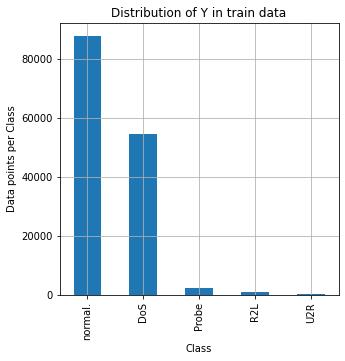

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 54572 ( 37.484 %)
Number of data points in class 3 : 2131 ( 1.464 %)
Number of data points in class 4 : 999 ( 0.686 %)
Number of data points in class 5 : 52 ( 0.036 %)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Y in train data')
plt.grid()
plt.show()
# ref: arg sort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1,':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Univariate histograms

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'28',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
df.hist(figsize=(50, 30), bins=20)
plt.show()

KeyboardInterrupt: ignored

Bivariate Analysis using pairplot

In [ ]:
import seaborn as sns
def pairplot(data, label, features=[]):
  sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features, plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

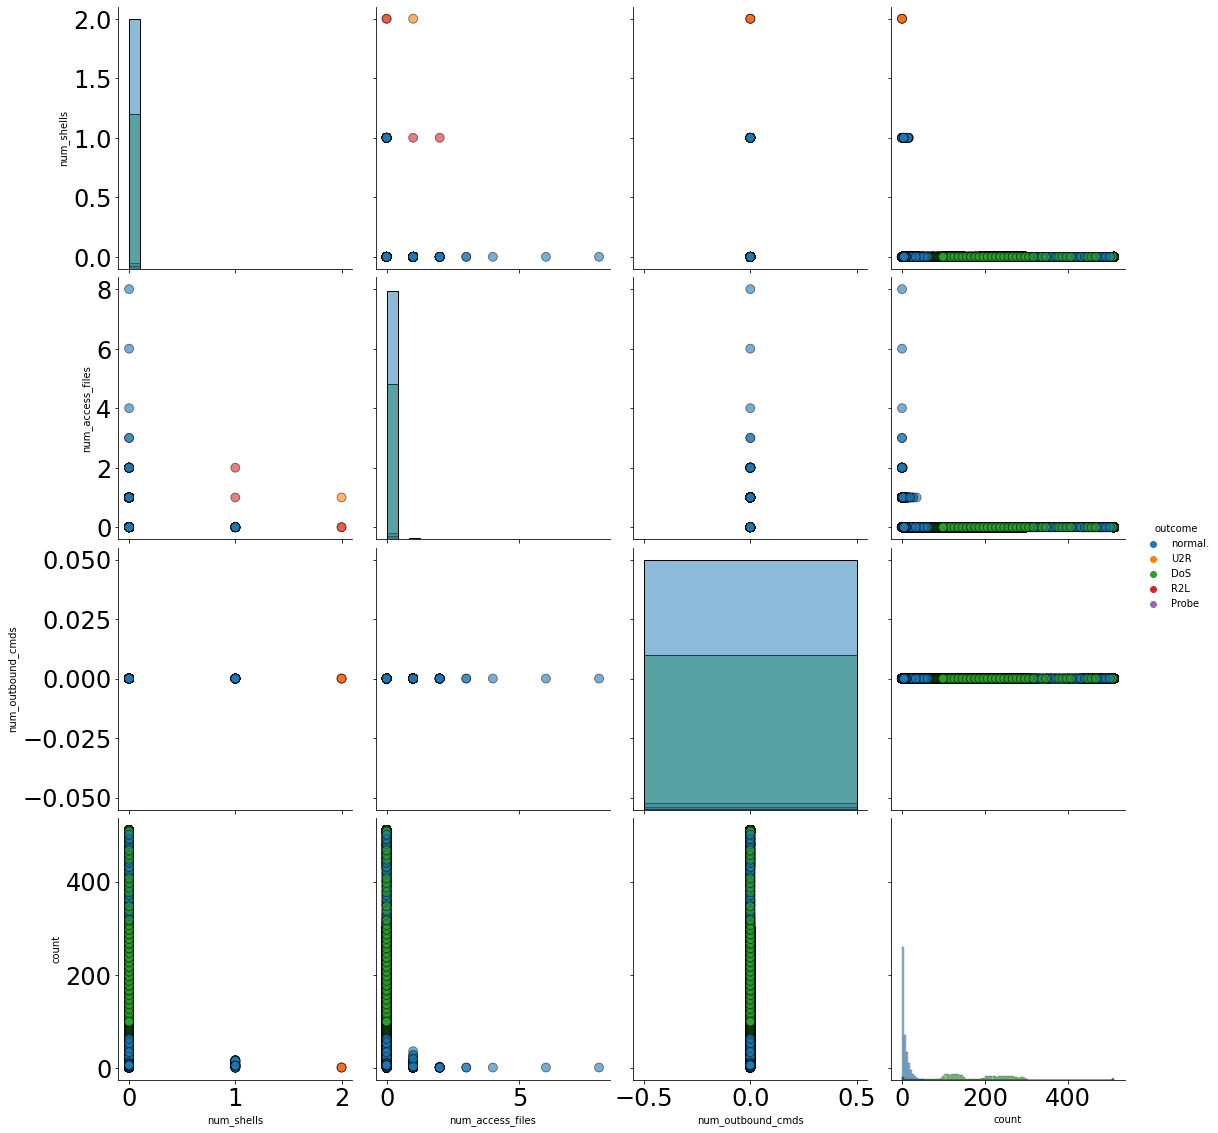

In [ ]:
pairplot(df,'outcome',features=['num_shells','num_access_files', 'num_outbound_cmds','count'])

## TSNE for Bivariate Analysis


In [ ]:
import sklearn
from sklearn.manifold import TSNE

In [ ]:
def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
  print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
  tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
  tsne_df1 = tsne.fit_transform(data)
  print(tsne_df1.shape)
  print(label)
  tsne_df1 = np.vstack((tsne_df1.T, label)).T
  tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
  sns.FacetGrid(tsne_data1, hue='Output', size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
  plt.show()

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.outcome)
df.head()



,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,1,...,0.0,normal.
1,0,1,...,0.0,normal.
2,0,1,...,0.0,normal.
3,0,1,...,0.0,normal.
4,0,1,...,0.0,normal.


In [ ]:
#For Multiclass
df['label'] = le.transform(df.outcome)
def label_class(x):
  if x == 'normal.':
    return 0
  elif x == 'DoS':
    return 1
  elif x == 'Probe':
    return 2
  elif x == 'R2L':
    return 3
  elif x == 'U2R':
    return 4
  
df['label'] = df['outcome']
df['label'] = df['label'].apply(label_class)
df.head()
# from sklearn import preprocessing
df['label'].value_counts()

0    87832
1    54572
2     2131
3      999
4       52
Name: label, dtype: int64

In [ ]:
tsne_func(df.iloc[:,:-2], df['label'], 2, 100, 1000)

TSNE with perplexity=100 and no. of iterations=1000


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

## Subplots

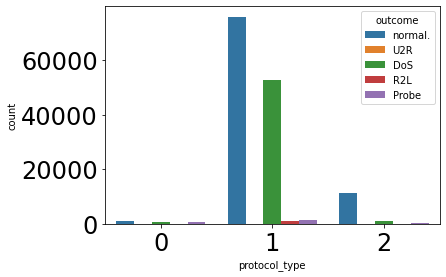

In [ ]:
data = df.copy()
sns.countplot(x = 'protocol_type',hue = "outcome",data = data)
plt.show()

Guest Login vs Traffic status
Influence of guest login


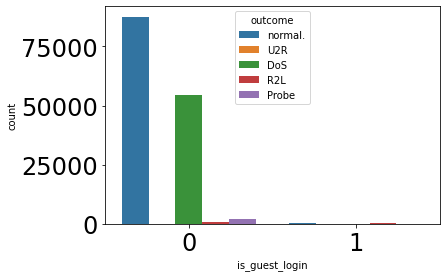

In [ ]:
sns.countplot(x = 'is_guest_login',hue = "outcome",data = data)
print("Guest Login vs Traffic status")
print('Influence of guest login')
plt.show()

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('______________________________')

duration
0        134975
1          2441
          ...  
18185         1
120           1
Name: duration, Length: 2495, dtype: int64
______________________________
protocol_type
1    130913
2     12267
0      2406
Name: protocol_type, dtype: int64
______________________________
service
22    62054
45    49057
      ...  
57        1
46        1
Name: service, Length: 66, dtype: int64
______________________________
flag
9    87459
5    42278
     ...  
8       10
0        7
Name: flag, Length: 11, dtype: int64
______________________________
src_bytes
0        57872
147       1962
         ...  
12289        1
475          1
Name: src_bytes, Length: 3300, dtype: int64
______________________________
dst_bytes
0        67663
105       3199
         ...  
7391         1
13828        1
Name: dst_bytes, Length: 10725, dtype: int64
______________________________
land
0    145566
1        20
Name: land, dtype: int64
______________________________
wrong_fragment
0    144465
3       910
1       21

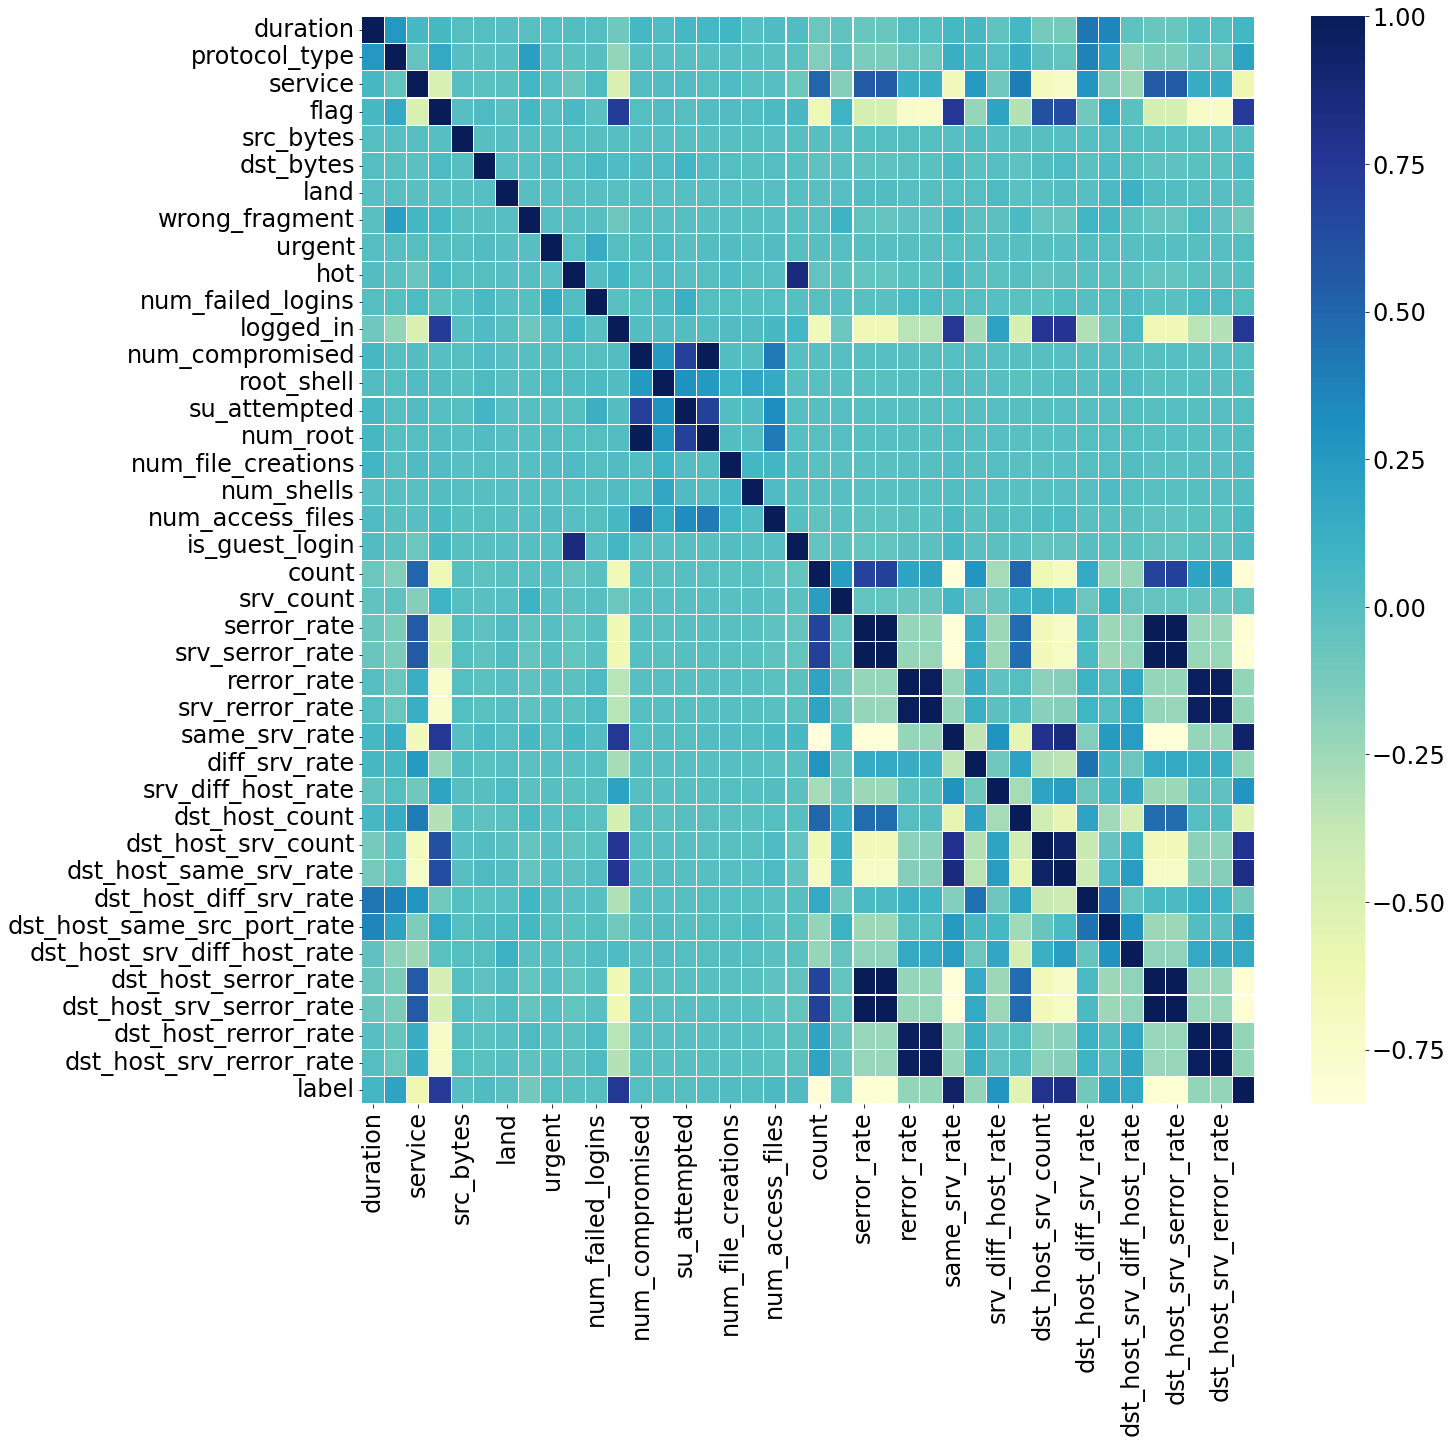

In [ ]:
f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix=data.drop(['num_outbound_cmds','is_host_login'],axis=1).corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)
plt.show()

## Feature Selection 

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
#This variable has zeroes in all the instances so we are ignored for analyzsis.
df.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [ ]:
df.head()

,duration,protocol_type,...,outcome,label
0,0,1,...,normal.,0
1,0,1,...,normal.,0
2,0,1,...,normal.,0
3,0,1,...,normal.,0
4,0,1,...,normal.,0


## Test Train data

In [ ]:
# df.drop('label',axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-2], df['label'], stratify=df['label'], test_size=0.25)
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)
X_train

Train data
(109189, 31)
(109189,)
Test data
(36397, 31)
(36397,)


,duration,protocol_type,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
145306,0,2,...,0.00,0.00
90618,0,1,...,0.00,0.00
...,...,...,...,...,...
346524,0,1,...,0.47,0.00
80692,0,1,...,0.00,0.01


Standardizing the features

In [ ]:
from sklearn.preprocessing import StandardScaler
def feature_scaling(X_train, X_test):
  scaler = StandardScaler()
  scaler1 = scaler.fit_transform(X_train)
  scaler2 = scaler.transform(X_test)
 
  return scaler1, scaler2

In [ ]:
x_train, x_test = feature_scaling(X_train, X_test)

In [ ]:
x_train

array([[-0.10686811,  3.01075436,  0.98500182, ..., -0.34880162,
        -0.38434638, -0.31704798],
       [-0.10686811, -0.21875315, -0.77746573, ..., -0.41728361,
        -0.38434638, -0.31704798],
       [-0.10686811, -0.21875315, -0.77746573, ..., -0.41728361,
        -0.38434638, -0.15029548],
       ...,
       [-0.10686811, -0.21875315, -0.77746573, ..., -0.41728361,
        -0.38434638, -0.31704798],
       [-0.10686811, -0.21875315, -1.0073528 , ..., -0.28031963,
         1.56863238, -0.31704798],
       [-0.10686811, -0.21875315, -0.77746573, ..., -0.41728361,
        -0.38434638, -0.15029548]])

## DNN Model 

In [ ]:
from __future__ import print_function
# from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
X_train1 = np.array(X_train)
X_test1 = np.array(X_test)
y_train1 = np.array(Y_train)
y_test1 = np.array(Y_test)


batch_size = 64

In [ ]:
y_train1

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=31,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/dnn1layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/dnn1layer/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1),batch_size=batch_size, epochs=100, callbacks=[checkpointer,csv_logger])
model.save("kddresults/dnn1layer/dnn1layer_model.hdf5")

Epoch 1/100
1706/1707 [============================>.] - ETA: 0s - loss: -982554432.0000 - accuracy: 0.1528
Epoch 1: loss improved from inf to -982533056.00000, saving model to kddresults/dnn1layer/checkpoint-01.hdf5
1707/1707 [==============================] - 13s 7ms/step - loss: -982533056.0000 - accuracy: 0.1528 - val_loss: -1259346432.0000 - val_accuracy: 0.1493
Epoch 2/100
1706/1707 [============================>.] - ETA: 0s - loss: -1154891648.0000 - accuracy: 0.1525
Epoch 2: loss improved from -982533056.00000 to -1154873728.00000, saving model to kddresults/dnn1layer/checkpoint-02.hdf5
1707/1707 [==============================] - 8s 5ms/step - loss: -1154873728.0000 - accuracy: 0.1525 - val_loss: -1465033856.0000 - val_accuracy: 0.1508
Epoch 3/100
1705/1707 [============================>.] - ETA: 0s - loss: -1339611904.0000 - accuracy: 0.1538
Epoch 3: loss improved from -1154873728.00000 to -1339405440.00000, saving model to kddresults/dnn1layer/checkpoint-03.hdf5
1707/1707 [=

In [ ]:
#Dnn 1 layer
model = Sequential()
model.add(Dense(1024,input_dim=31,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(5))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/dnn1layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/dnn1layer/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=batch_size, epochs=2, callbacks=[checkpointer,csv_logger])
model.save("kddresults/dnn1layer/dnn1layer_model.hdf5")



Epoch 1/2
1701/1707 [============================>.] - ETA: 0s - loss: 982.5101 - accuracy: 0.9517
Epoch 1: loss improved from inf to 979.74286, saving model to kddresults/dnn1layer/checkpoint-01.hdf5
1707/1707 [==============================] - 17s 9ms/step - loss: 979.7429 - accuracy: 0.9518 - val_loss: 89.9983 - val_accuracy: 0.9687
Epoch 2/2
1699/1707 [============================>.] - ETA: 0s - loss: 2173.3560 - accuracy: 0.9666
Epoch 2: loss did not improve from 979.74286
1707/1707 [==============================] - 14s 8ms/step - loss: 2165.7212 - accuracy: 0.9660 - val_loss: 603.2380 - val_accuracy: 0.8710


In [ ]:
from google.colab import  drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [ ]:
#dnn 5
model = Sequential()
model.add(Dense(1024,input_dim=31,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(5))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/dnn5layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/dnn5layer/training_set_dnnanalysis.csv',separator=',', append=False)
hist_5 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=batch_size, epochs=100, callbacks=[checkpointer,csv_logger])
model.save("kddresults/dnn5layer/dnn5layer_model.hdf5")


Epoch 1/100
1705/1707 [============================>.] - ETA: 0s - loss: 362.5319 - accuracy: 0.9244
Epoch 1: loss improved from inf to 362.30286, saving model to kddresults/dnn5layer/checkpoint-01.hdf5
1707/1707 [==============================] - 54s 31ms/step - loss: 362.3029 - accuracy: 0.9245 - val_loss: 22.7835 - val_accuracy: 0.9835
Epoch 2/100
1706/1707 [============================>.] - ETA: 0s - loss: 57.3167 - accuracy: 0.9667
Epoch 2: loss improved from 362.30286 to 57.31405, saving model to kddresults/dnn5layer/checkpoint-02.hdf5
1707/1707 [==============================] - 50s 29ms/step - loss: 57.3141 - accuracy: 0.9667 - val_loss: 2.2758 - val_accuracy: 0.9831
Epoch 3/100
1706/1707 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9823
Epoch 3: loss improved from 57.31405 to 0.13996, saving model to kddresults/dnn5layer/checkpoint-03.hdf5
1707/1707 [==============================] - 50s 29ms/step - loss: 0.1400 - accuracy: 0.9823 - val_loss: 0.0836 

In [ ]:
from google.colab import drive
drive.mount('/content/drive2')

Mounted at /content/drive2


In [ ]:
model.save("drive/MyDrive/CIP/multiclassmodel.h5")

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1138/1138 - 4s - loss: 0.0936 - accuracy: 0.9834 - 4s/epoch - 4ms/step
Restored model, accuracy: 98.34%


In [ ]:
np.save('/drive/MyDrive/CIP/hist_5.npy',hist_5.history)

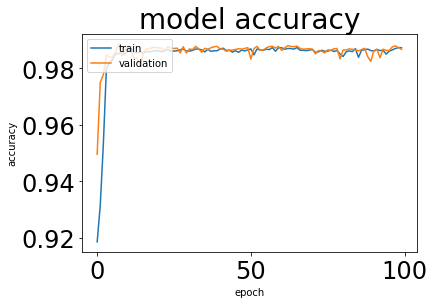

In [ ]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_history(hist_5)

In [ ]:
#Dnn3
model = Sequential()
model.add(Dense(1024,input_dim=31,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(5))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/dnn3layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/dnn3layer/training_set_dnnanalysis.csv',separator=',', append=False)
history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=100, callbacks=[checkpointer,csv_logger])
model.save("drive/MyDrive/CIP/dnn3layermulticlassmodel.h5")


Epoch 1/100
1704/1707 [============================>.] - ETA: 0s - loss: 1258.9740 - accuracy: 0.9352
Epoch 1: loss improved from inf to 1259.52942, saving model to kddresults/dnn3layer/checkpoint-01.hdf5
1707/1707 [==============================] - 11s 5ms/step - loss: 1259.5294 - accuracy: 0.9352 - val_loss: 65.6044 - val_accuracy: 0.9717
Epoch 2/100
1689/1707 [============================>.] - ETA: 0s - loss: 78.8325 - accuracy: 0.9575
Epoch 2: loss improved from 1259.52942 to 78.14530, saving model to kddresults/dnn3layer/checkpoint-02.hdf5
1707/1707 [==============================] - 6s 3ms/step - loss: 78.1453 - accuracy: 0.9576 - val_loss: 93.4995 - val_accuracy: 0.9756
Epoch 3/100
1699/1707 [============================>.] - ETA: 0s - loss: 140.2431 - accuracy: 0.9580
Epoch 3: loss did not improve from 78.14530
1707/1707 [==============================] - 6s 3ms/step - loss: 141.3845 - accuracy: 0.9579 - val_loss: 21.1805 - val_accuracy: 0.9689
Epoch 4/100
1693/1707 [==========

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              32768     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 768)               787200    
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               393728    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2

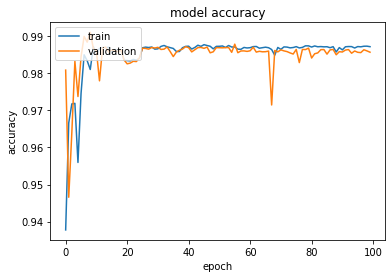

In [ ]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_history(history)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model.save("/content/drive2/MyDrive/CIP/dnn3layermulticlassmodel.h5")

In [ ]:
model1 = load_model("drive/MyDrive/CIP/dnn3layermulticlassmodel.h5")

NameError: ignored